In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop

Keras is the deep learning library that helps you to code Deep Neural Networks with fewer lines of code

# **Import data**

In [3]:
batch_size=128
num_classes=10
epochs=100

#the data split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(10000, 784).astype('float32')

# Normalize to 0 to 1 range
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples


**Visualize Data**

Label: [[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


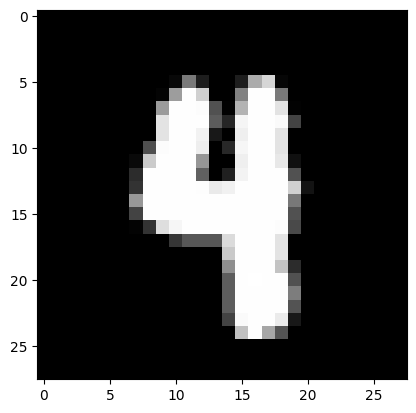

In [4]:
print("Label:",y_test[250:251])
plt.imshow(x_test[250:251].reshape(28,28), cmap='gray')
plt.show()

Note: Images are also considered as numerical matrices

Design a model

In [5]:
first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 27562 (107.66 KB)
Trainable params: 27562 (107.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Weights before Training

Shape of First Layer (784, 32)
Visualization of First Layer


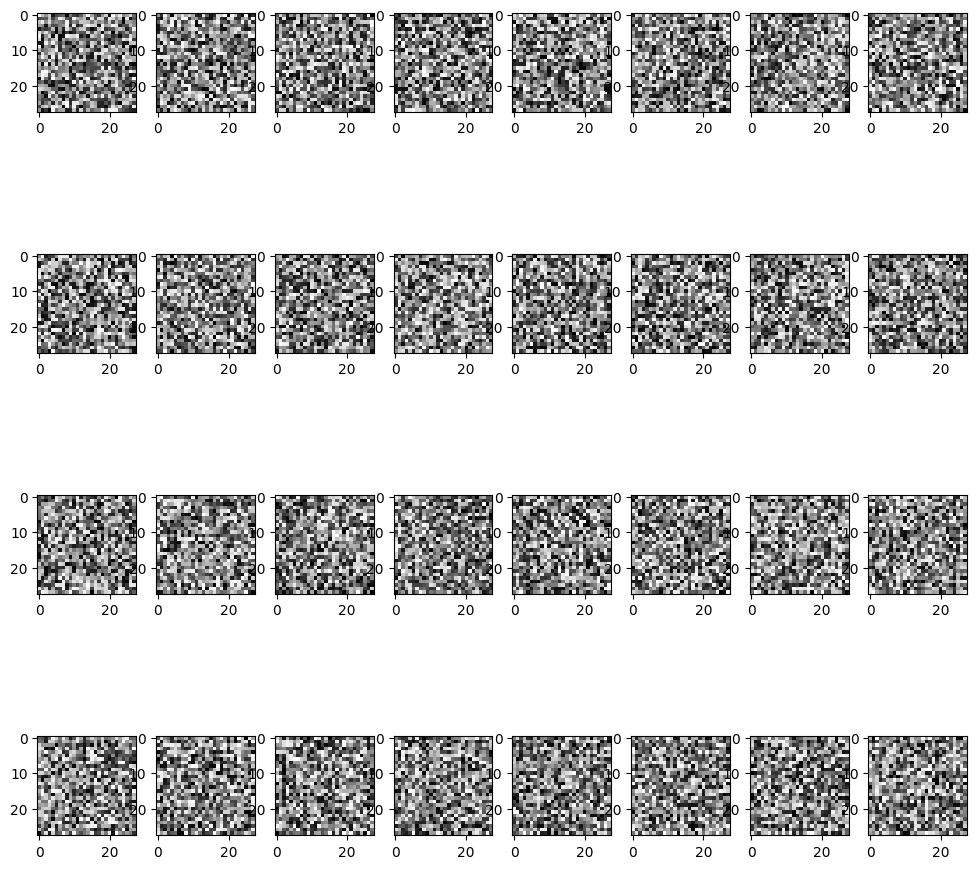

In [6]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()


Compiling a Model

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

Training

In [8]:
# Write the Training input and output variables, size of the batch, number of epochs
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/100
469/469 [==============================] - 4s 3ms/step - loss: 1.7029 - accuracy: 0.5056
Epoch 2/100
469/469 [==============================] - 2s 3ms/step - loss: 0.7425 - accuracy: 0.8029
Epoch 3/100
469/469 [==============================] - 2s 3ms/step - loss: 0.4340 - accuracy: 0.8874
Epoch 4/100
469/469 [==============================] - 2s 3ms/step - loss: 0.3122 - accuracy: 0.9161
Epoch 5/100
469/469 [==============================] - 2s 3ms/step - loss: 0.2543 - accuracy: 0.9301
Epoch 6/100
469/469 [==============================] - 2s 4ms/step - loss: 0.2180 - accuracy: 0.9401
Epoch 7/100
469/469 [==============================] - 2s 5ms/step - loss: 0.1924 - accuracy: 0.9463
Epoch 8/100
469/469 [==============================] - 2s 4ms/step - loss: 0.1721 - accuracy: 0.9526
Epoch 9/100
469/469 [==============================] - 2s 3ms/step - loss: 0.1555 - accuracy: 0.9566
Epoch 10/100
469/469 [==============================] - 2s 3ms/step - loss: 0.1429 - accura

Testing

In [9]:
# Write the testing input and output variables
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.20596849918365479
Test accuracy: 0.9639000296592712


Weights after Training

Shape of First Layer (784, 32)
Visualization of First Layer


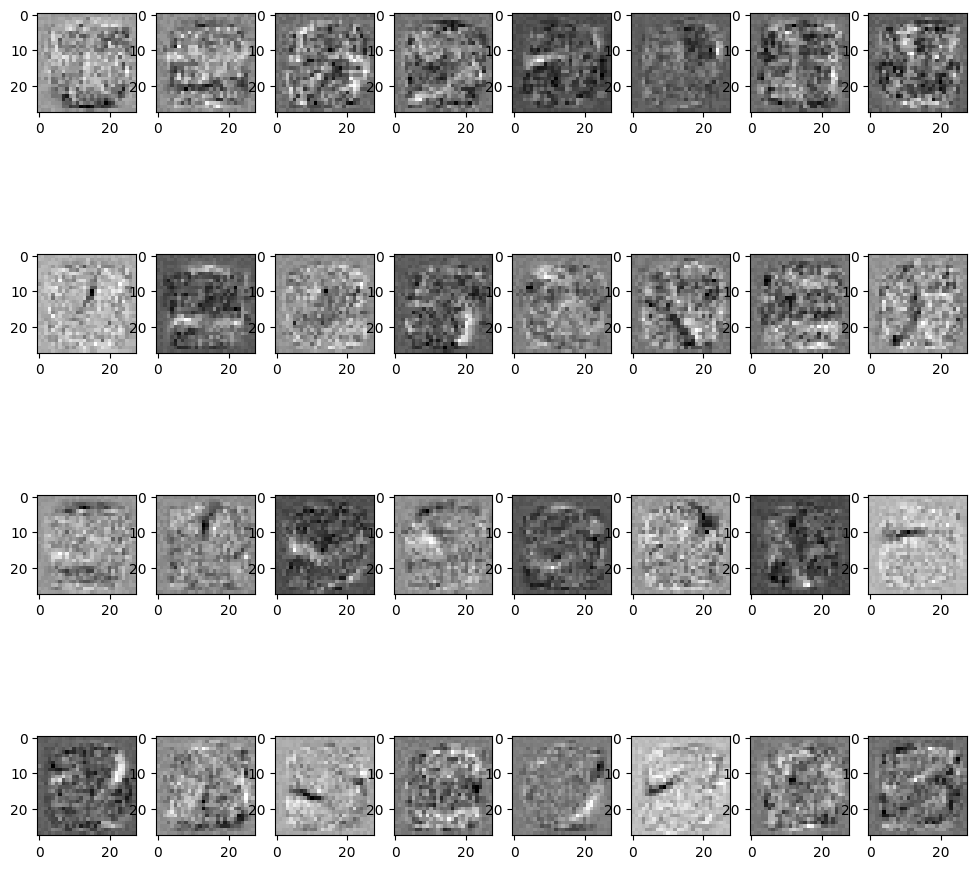

In [10]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

Take away:
This internal representation reflects Latent Variables.
Each of the nodes will look for a specific pattern in the input.
A node will get activated if input is similar to the feature it looks for.
Each node is unique and often orthogonal to each other.


Prediction

In [11]:
# Write the index of the test sample to test
prediction = model.predict(x_test[23:24])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

1/1 [==============================] - 0s 130ms/step
Prediction
 [2.4544486e-10 2.8779615e-13 7.7756625e-15 1.5064034e-08 2.7524576e-13
 1.0000000e+00 1.4487808e-10 1.1190533e-13 1.2362563e-11 2.6611315e-09]

Thresholded output
 [0 0 0 0 0 1 0 0 0 0]


Ground truth

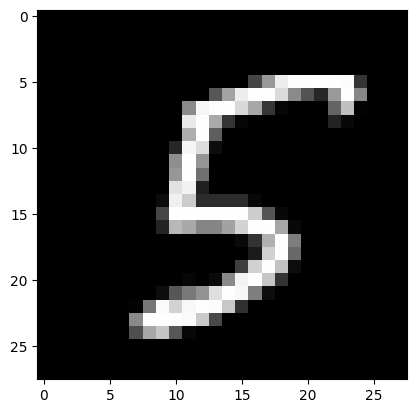

In [12]:
# Write the index of the test sample to show
plt.imshow(x_test[23:24].reshape(28,28),cmap='gray')
plt.show()

User Input

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


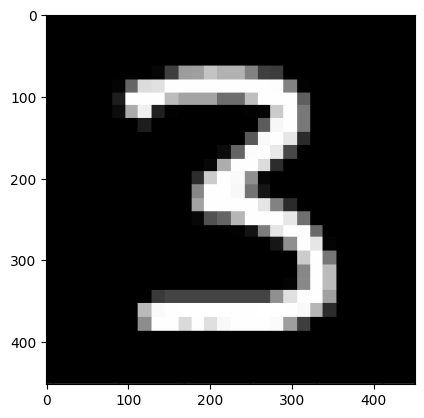

In [19]:
from google.colab import drive
drive.mount('/content/drive')
test=plt.imread("/content/drive/My Drive/Colab Notebooks/Test_image.png")
img=plt.imshow(test)

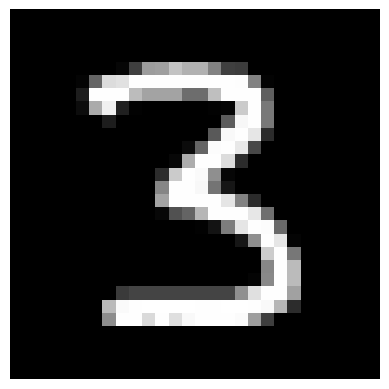

In [20]:
# Load image as grayscale
# Write the path to the image
import cv2
image = cv2.imread("/content/drive/My Drive/Colab Notebooks/Test_image.png", cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image, (28, 28))
# Show image
plt.imshow(image_resized, cmap='gray'), plt.axis("off")
plt.show()

Prediction

In [21]:
prediction = model.predict(image_resized.reshape(1,784))
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[1][0])

1/1 [==============================] - 0s 17ms/step
Prediction Score:
 [5.9451637e-14 2.9806080e-14 1.1690240e-09 1.0000000e+00 7.3243793e-20
 3.1355686e-08 3.1415495e-19 1.4754617e-12 1.1898048e-09 3.1268714e-09]

Thresholded Score:
 [0 0 0 1 0 0 0 0 0 0]

Predicted Digit:
 3


Saving a model

In [22]:
# serialize model to JSON
model_json = model.to_json()

# Write the file name of the model

with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
# Write the file name of the weights

model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


Loading a model

In [23]:
# load json and create model

# Write the file name of the model

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
# Write the file name of the weights

loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


Retraining a model

In [24]:
loaded_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

history = loaded_model.fit(x_train, y_train, batch_size=batch_size, epochs=2, verbose=1)
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/2
469/469 [==============================] - 3s 3ms/step - loss: 0.0075 - accuracy: 0.9983
Epoch 2/2
469/469 [==============================] - 1s 3ms/step - loss: 0.0073 - accuracy: 0.9981
Test loss: 0.20878933370113373
Test accuracy: 0.9645000100135803


Saving a model and resuming the training later is the great relief in training large neural networks !

What are your findings?;
Other Activation Functions;
model.add(Dense(8, activation='tanh'));
model.add(Dense(8, activation='linear'));
model.add(Dense(8, activation='hard_sigmoid'));

Tips:
Relu is commonly used in most hidden layers;
In case of dead neurons, use leaky Relu;